# Light AutoML (LAMA)

In [1]:
!pip install -U lightautoml

In [2]:
# Standard python libraries
import logging
import os
import time
import requests
import seaborn as sns
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task


In [91]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 600 # Time in seconds for automl run
TARGET_NAME = 'Selling_Price' # Target column name

In [44]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [45]:
train_data.shape

(301, 9)

In [46]:
train_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       2
Fuel_Type        1
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

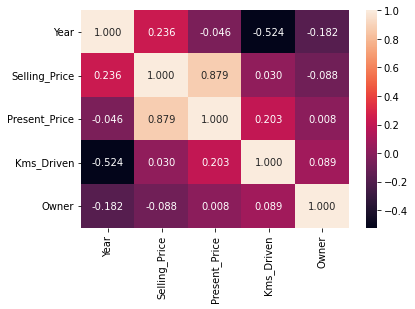

In [47]:
sns.heatmap(train_data.corr(), annot=True, fmt='.3f')

In [48]:
X = train_data.drop([TARGET_NAME], axis=1)
y = train_data[TARGET_NAME]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

In [50]:
%%time

task = Task('reg', )

CPU times: user 1.44 ms, sys: 0 ns, total: 1.44 ms
Wall time: 1.46 ms


In [51]:
%%time

roles = {'target': TARGET_NAME,}

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 24.1 µs


In [52]:
train_df = X_train
train_df[TARGET_NAME] = y_train
train_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
150,TVS Apache RTR 180,2011,0.826,6000.0,Petrol,Individual,Manual,0,0.50
8,ciaz,2016,8.890,20273.0,Diesel,Dealer,Manual,0,8.75
4,swift,2014,6.870,42450.0,Diesel,Dealer,Manual,0,4.60
139,Bajaj Avenger 220 dtsi,2015,0.950,16600.0,Petrol,Individual,Manual,0,0.60
58,etios g,2014,6.800,39485.0,Petrol,Dealer,Manual,1,4.10


In [53]:
test_df = X_test
test_df[TARGET_NAME] = y_test
test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,corolla altis,2009,15.04,70000.0,Petrol,Dealer,Automatic,0,3.60
151,Hero Passion X pro,2016,0.55,31000.0,Petrol,Individual,Manual,0,0.50
160,Bajaj Avenger Street 220,2011,0.95,24000.0,Petrol,Individual,Manual,0,0.45
180,Hero Honda Passion Pro,2012,0.51,60000.0,Petrol,Individual,Manual,0,0.30
94,corolla altis,2008,22.78,89000.0,Petrol,Dealer,Automatic,0,4.00


In [54]:
%%time 

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_df, roles = roles)
# logging.info('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

Streaming output truncated to the last 5000 lines.
[2022-03-20 12:55:51,430] (DEBUG): 668:	learn: 0.2453767	test: 1.3571444	best: 1.3569350 (665)	total: 540ms	remaining: 1.07s
[2022-03-20 12:55:51,432] (DEBUG): 669:	learn: 0.2451432	test: 1.3579090	best: 1.3569350 (665)	total: 540ms	remaining: 1.07s
[2022-03-20 12:55:51,433] (DEBUG): 670:	learn: 0.2450172	test: 1.3579014	best: 1.3569350 (665)	total: 540ms	remaining: 1.07s
[2022-03-20 12:55:51,435] (DEBUG): 671:	learn: 0.2446818	test: 1.3575852	best: 1.3569350 (665)	total: 541ms	remaining: 1.07s
[2022-03-20 12:55:51,436] (DEBUG): 672:	learn: 0.2445905	test: 1.3577131	best: 1.3569350 (665)	total: 541ms	remaining: 1.07s
[2022-03-20 12:55:51,438] (DEBUG): 673:	learn: 0.2445080	test: 1.3577084	best: 1.3569350 (665)	total: 542ms	remaining: 1.06s
[2022-03-20 12:55:51,440] (DEBUG): 674:	learn: 0.2443461	test: 1.3575076	best: 1.3569350 (665)	total: 542ms	remaining: 1.06s
[2022-03-20 12:55:51,442] (DEBUG): 675:	learn: 0.2439599	test: 1.3582687	b

CPU times: user 6min 21s, sys: 33.1 s, total: 6min 54s
Wall time: 7min 14s


CPU times: user 40.1 ms, sys: 0 ns, total: 40.1 ms
Wall time: 42.9 ms


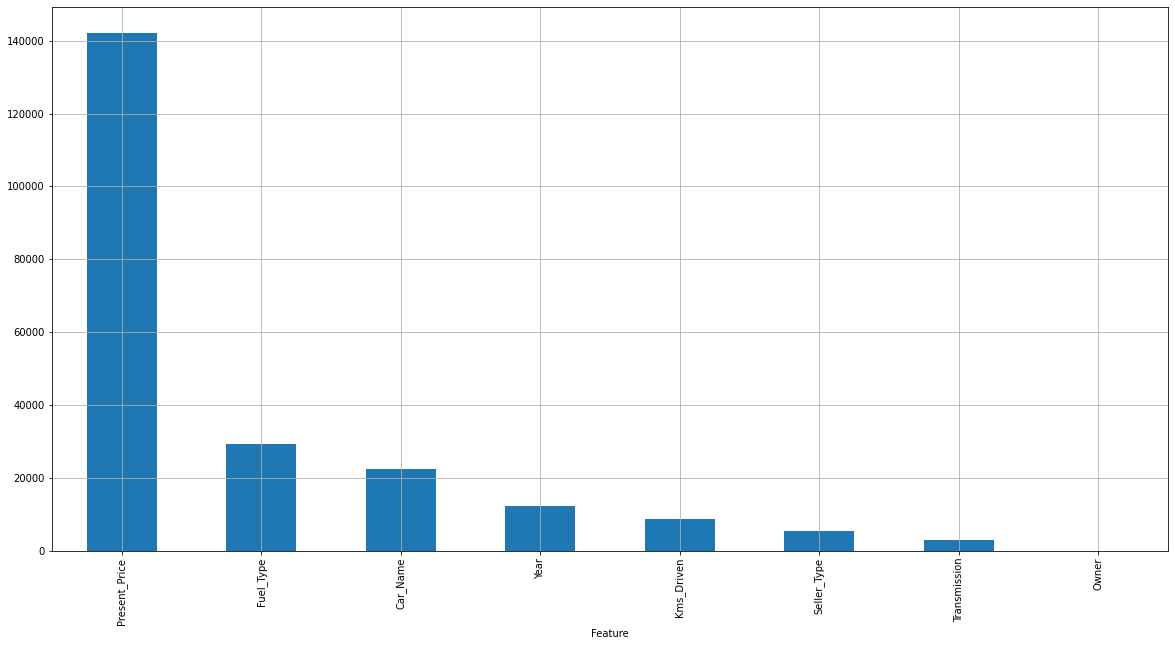

In [57]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

In [58]:
%%time

test_pred = automl.predict(test_df) # drop y

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_pred.data[:, 0])))

[2022-03-20 13:15:30,781] (INFO): Check scores for test data...
[2022-03-20 13:15:30,784] (INFO): MAE score: 0.8340315334669879
[2022-03-20 13:15:30,790] (INFO): MSE score: 1.415805994251153
[2022-03-20 13:15:30,795] (INFO): MedAE score: 0.5953553199768065
[2022-03-20 13:15:30,800] (INFO): R2 score: 0.9062383300188849


CPU times: user 216 ms, sys: 15.9 ms, total: 232 ms
Wall time: 236 ms


In [59]:
logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, oof_pred.data[:, 0])))

[2022-03-20 13:15:33,764] (INFO): Check scores for train data...
[2022-03-20 13:15:33,775] (INFO): MAE score: 1.0565259723737837
[2022-03-20 13:15:33,783] (INFO): MSE score: 3.1754962807345968
[2022-03-20 13:15:33,790] (INFO): MedAE score: 0.6251708030700683
[2022-03-20 13:15:33,797] (INFO): R2 score: 0.8881542896529384


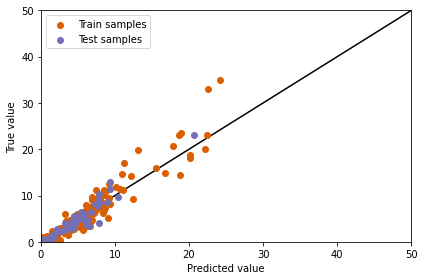

In [62]:
import matplotlib.pyplot as plt

plt.scatter(oof_pred.data[:, 0], train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_pred.data[:, 0], test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

# Linear Regression

Преобразуем категориальные признаки в числовые и заполним пропуски в данных

In [86]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [64]:
train_data.shape

(301, 9)

In [65]:
train_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       2
Fuel_Type        1
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

# Закодирую категориальные признаки в числовые
le = LabelEncoder()

# Делаем копию данных
new_df = train_data.copy()

car_name = le.fit_transform(train_data['Car_Name'])
fuel_type = le.fit_transform(train_data['Fuel_Type'])
seller_type = le.fit_transform(train_data['Seller_Type'])
transmission = le.fit_transform(train_data['Transmission'])

new_df['Car_Name'] = car_name
new_df['Fuel_Type'] = fuel_type
new_df['Seller_Type'] = seller_type
new_df['Transmission'] = transmission

In [67]:
new_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5200.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

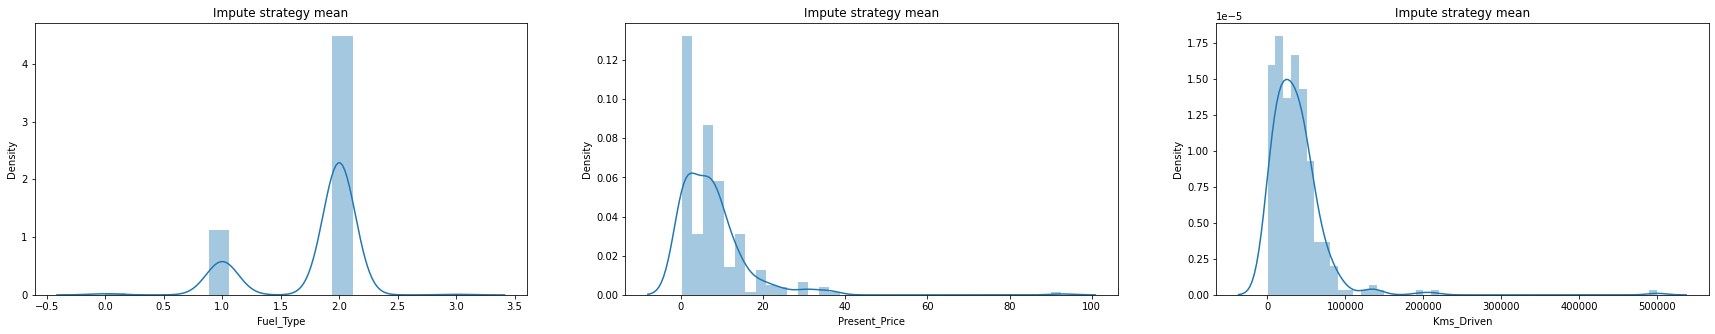

In [68]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

new_df["Fuel_Type"] = mean_imp.fit_transform(new_df[["Fuel_Type"]])
new_df["Present_Price"] = mean_imp.fit_transform(new_df[["Present_Price"]])
new_df["Kms_Driven"] = mean_imp.fit_transform(new_df[["Kms_Driven"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["Fuel_Type"], ax=ax[0])
sns.distplot(new_df["Present_Price"], ax=ax[1])
sns.distplot(new_df["Kms_Driven"], ax=ax[2])

In [69]:
X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]

In [70]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X_mean = scaler.fit_transform(X)
pd.DataFrame(X_mean, columns=columns).describe()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02
mean,-1.904162e-16,-2.935636e-14,1.103768e-16,1.689309e-16,1.554681e-16,6.085940e-16,1.290957e-17,8.649412e-17
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00
min,-2.450800e+00,-3.681621e+00,-8.502754e-01,-9.407945e-01,-4.158475e+00,-7.372854e-01,-2.554408e+00,-1.745006e-01
25%,-6.099024e-01,-5.639244e-01,-7.482393e-01,-5.671153e-01,4.860556e-01,-7.372854e-01,3.914801e-01,-1.745006e-01
50%,2.517945e-01,1.288970e-01,-1.035563e-01,-1.290086e-01,4.860556e-01,-7.372854e-01,3.914801e-01,-1.745006e-01
75%,7.609791e-01,8.217184e-01,2.605272e-01,3.030935e-01,4.860556e-01,1.356327e+00,3.914801e-01,-1.745006e-01
max,1.348500e+00,1.514540e+00,9.849607e+00,1.193181e+01,2.808321e+00,1.356327e+00,3.914801e-01,1.194658e+01


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

In [72]:
new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,71,2009,15.04,70000.0,2.0,0,0,0,3.60
151,26,2016,0.55,31000.0,2.0,1,1,0,0.50
160,8,2011,0.95,24000.0,2.0,1,1,0,0.45
180,23,2012,0.51,60000.0,2.0,1,1,0,0.30
94,71,2008,22.78,89000.0,2.0,0,0,0,4.00


In [73]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [74]:
test_predictions = lin_model.predict(X_test)

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

[2022-03-20 13:24:33,986] (INFO): Check scores for test data...
[2022-03-20 13:24:33,991] (INFO): MAE score: 1.0925030916360972e-11
[2022-03-20 13:24:33,997] (INFO): MSE score: 2.3717101163732314e-22
[2022-03-20 13:24:34,002] (INFO): MedAE score: 1.0317524612446505e-11
[2022-03-20 13:24:34,008] (INFO): R2 score: 1.0


In [75]:
train_predictions = lin_model.predict(X_train)

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

[2022-03-20 13:24:39,392] (INFO): Check scores for train data...
[2022-03-20 13:24:39,405] (INFO): MAE score: 1.0545243844806152e-11
[2022-03-20 13:24:39,410] (INFO): MSE score: 3.8852559289129776e-22
[2022-03-20 13:24:39,416] (INFO): MedAE score: 8.3357765134906e-12
[2022-03-20 13:24:39,422] (INFO): R2 score: 1.0


In [76]:
lin_model.coef_

array([-1.69960805e-16, -9.50151416e-15,  4.65644504e-16, -4.87890978e-16,
       -1.49515619e-15, -2.26939047e-15, -6.41990464e-16, -4.38294982e-16,
        1.00000000e+00])

In [77]:
coefficents = pd.DataFrame(lin_model.coef_, X_train.columns, columns=['Coefficients'])
print(coefficents)

               Coefficients
Car_Name      -1.699608e-16
Year          -9.501514e-15
Present_Price  4.656445e-16
Kms_Driven    -4.878910e-16
Fuel_Type     -1.495156e-15
Seller_Type   -2.269390e-15
Transmission  -6.419905e-16
Owner         -4.382950e-16
Selling_Price  1.000000e+00


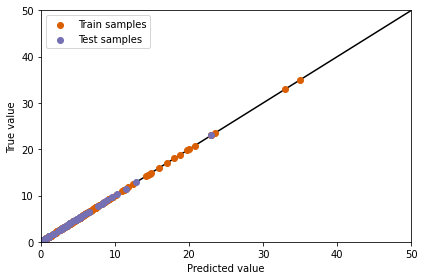

In [78]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

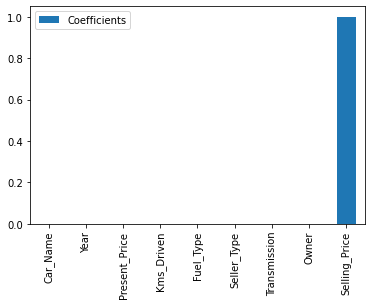

In [79]:
coefficents.plot.bar()

Можно сделать вывод, что данные очень хорошо аппроксимируются прямой линией, то есть наиболее точно опишет выборку модель линейной регрессии.

## TPOT

In [82]:
from tpot import TPOTRegressor

In [81]:
!pip install tpot 

     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 173.6 MB 7.9 kB/s 
     |████████████████████████████████| 160 kB 54.0 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=c4f85791bc359992ea0f36f55b1fec137493943e8414a6087b1ce0c86d9a2172
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [83]:
# By default, accuracy is used for classification and mean squared error (MSE) is used for regression.
tpot_settings = dict(verbosity=2, random_state = 1234, warm_start = True)

In [ ]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

In [84]:
train_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
150,TVS Apache RTR 180,2011,0.826,6000.0,Petrol,Individual,Manual,0,0.50
8,ciaz,2016,8.890,20273.0,Diesel,Dealer,Manual,0,8.75
4,swift,2014,6.870,42450.0,Diesel,Dealer,Manual,0,4.60
139,Bajaj Avenger 220 dtsi,2015,0.950,16600.0,Petrol,Individual,Manual,0,0.60
58,etios g,2014,6.800,39485.0,Petrol,Dealer,Manual,1,4.10


TPOT не умеет работать с данными, содержащими пропуски и категориальные признаки. Поэтому подготовим данные перед тем, как подать их на вход TPOT

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Закодирую категориальные признаки в числовые
le = LabelEncoder()

# Делаем копию данных
new_df = train_data.copy()

car_name = le.fit_transform(train_data['Car_Name'])
fuel_type = le.fit_transform(train_data['Fuel_Type'])
seller_type = le.fit_transform(train_data['Seller_Type'])
transmission = le.fit_transform(train_data['Transmission'])

new_df['Car_Name'] = car_name
new_df['Fuel_Type'] = fuel_type
new_df['Seller_Type'] = seller_type
new_df['Transmission'] = transmission

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

mean_imp = SimpleImputer(strategy="mean")

new_df["Fuel_Type"] = mean_imp.fit_transform(new_df[["Fuel_Type"]])
new_df["Present_Price"] = mean_imp.fit_transform(new_df[["Present_Price"]])
new_df["Kms_Driven"] = mean_imp.fit_transform(new_df[["Kms_Driven"]])

fig, ax =plt.subplots(1,3, figsize=(30,5))
ax[0].set_title('Impute strategy mean')
ax[1].set_title('Impute strategy mean')
ax[2].set_title('Impute strategy mean')

sns.distplot(new_df["Fuel_Type"], ax=ax[0])
sns.distplot(new_df["Present_Price"], ax=ax[1])
sns.distplot(new_df["Kms_Driven"], ax=ax[2])

In [87]:
new_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2.0,0,1,0
1,93,2013,4.75,9.54,43000.0,1.0,0,1,0
2,68,2017,7.25,9.85,6900.0,2.0,0,1,0
3,96,2011,2.85,4.15,5200.0,2.0,0,1,0
4,92,2014,4.60,6.87,42450.0,1.0,0,1,0


In [92]:
X = new_df.drop([TARGET_NAME], axis=1)
y = new_df[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)

new_train_df = X_train
new_train_df[TARGET_NAME] = y_train
new_train_df.head()

new_test_df = X_test
new_test_df[TARGET_NAME] = y_test
new_test_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
55,71,2009,15.04,70000.0,2.0,0,0,0,3.60
151,26,2016,0.55,31000.0,2.0,1,1,0,0.50
160,8,2011,0.95,24000.0,2.0,1,1,0,0.45
180,23,2012,0.51,60000.0,2.0,1,1,0,0.30
94,71,2008,22.78,89000.0,2.0,0,0,0,4.00


In [93]:
%%time
auto_reg = TPOTRegressor(generations=2, population_size=5, **tpot_settings)

CPU times: user 46 µs, sys: 0 ns, total: 46 µs
Wall time: 51.5 µs


In [95]:
auto_reg.fit(new_df.drop(TARGET_NAME,1), new_df[TARGET_NAME])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.340803893513998

Generation 2 - Current best internal CV score: -4.333878725028628

Best pipeline: XGBRegressor(LinearSVR(input_matrix, C=0.01, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, tol=1e-05), learning_rate=0.5, max_depth=2, min_child_weight=9, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


TPOTRegressor(generations=2, population_size=5, random_state=1234, verbosity=2,
              warm_start=True)

In [98]:
test_predictions = auto_reg.predict(new_test_df.drop(TARGET_NAME,1))

logging.info('Check scores for test data...')
logging.info('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
logging.info('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"
[2022-03-20 13:41:52,400] (INFO): Check scores for test data...
[2022-03-20 13:41:52,409] (INFO): MAE score: 0.2842355903641123
[2022-03-20 13:41:52,417] (INFO): MSE score: 0.14132591459709676
[2022-03-20 13:41:52,424] (INFO): MedAE score: 0.22187814712524423
[2022-03-20 13:41:52,431] (INFO): R2 score: 0.9906406994898754


In [99]:
train_predictions = auto_reg.predict(new_train_df.drop(TARGET_NAME,1))

logging.info('Check scores for train data...')
logging.info('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
logging.info('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  "X does not have valid feature names, but"
[2022-03-20 13:42:15,546] (INFO): Check scores for train data...
[2022-03-20 13:42:15,555] (INFO): MAE score: 0.3812950575929135
[2022-03-20 13:42:15,562] (INFO): MSE score: 0.34010471248822977
[2022-03-20 13:42:15,567] (INFO): MedAE score: 0.22438755750656114
[2022-03-20 13:42:15,575] (INFO): R2 score: 0.9880210052861944


In [100]:
# Get the best model
exctracted_best_model = auto_reg.fitted_pipeline_.steps[-1][1]

print(exctracted_best_model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=2, min_child_weight=9, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=1234,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [101]:
# Access it's features
exctracted_best_model.feature_importances_

array([0.405926  , 0.01031797, 0.05533714, 0.30651212, 0.02423376,
       0.17671807, 0.        , 0.02095495, 0.        ], dtype=float32)

In [102]:
coefficents = pd.DataFrame(exctracted_best_model.feature_importances_, X_train.columns, columns=['Coefficients'])
print(coefficents)

               Coefficients
Car_Name           0.405926
Year               0.010318
Present_Price      0.055337
Kms_Driven         0.306512
Fuel_Type          0.024234
Seller_Type        0.176718
Transmission       0.000000
Owner              0.020955
Selling_Price      0.000000


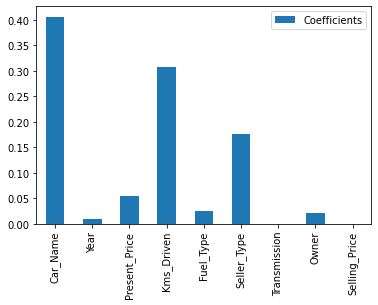

In [103]:
coefficents.plot.bar()

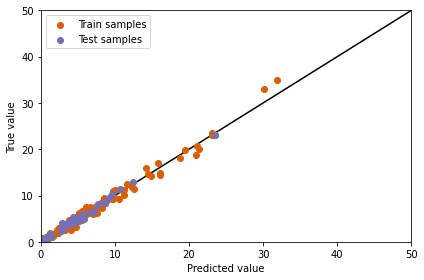

In [104]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

### Auto-sklearn

In [1]:
!pip3 install auto-sklearn

In [2]:
import autosklearn.regression

In [5]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

TARGET_NAME = "Selling_Price"

X = train_data.drop(["Selling_Price"], axis=1)
y = train_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [6]:
train_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
150,TVS Apache RTR 180,2011,0.826,6000.0,Petrol,Individual,Manual,0,0.50
8,ciaz,2016,8.890,20273.0,Diesel,Dealer,Manual,0,8.75
4,swift,2014,6.870,42450.0,Diesel,Dealer,Manual,0,4.60
139,Bajaj Avenger 220 dtsi,2015,0.950,16600.0,Petrol,Individual,Manual,0,0.60
58,etios g,2014,6.800,39485.0,Petrol,Dealer,Manual,1,4.10


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 150 to 127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       240 non-null    object 
 1   Year           240 non-null    int64  
 2   Present_Price  238 non-null    float64
 3   Kms_Driven     238 non-null    float64
 4   Fuel_Type      239 non-null    object 
 5   Seller_Type    240 non-null    object 
 6   Transmission   240 non-null    object 
 7   Owner          240 non-null    int64  
 8   Selling_Price  240 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 18.8+ KB


In [8]:
train_df['Car_Name'] = train_df['Car_Name'].astype('category')
train_df['Fuel_Type'] = train_df['Fuel_Type'].astype('category')
train_df['Seller_Type'] = train_df['Seller_Type'].astype('category')
train_df['Transmission'] = train_df['Transmission'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 150 to 127
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       240 non-null    category
 1   Year           240 non-null    int64   
 2   Present_Price  238 non-null    float64 
 3   Kms_Driven     238 non-null    float64 
 4   Fuel_Type      239 non-null    category
 5   Seller_Type    240 non-null    category
 6   Transmission   240 non-null    category
 7   Owner          240 non-null    int64   
 8   Selling_Price  240 non-null    float64 
dtypes: category(4), float64(3), int64(2)
memory usage: 15.3 KB


In [10]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/content/autosklearn_regression_example_tmp3',
    n_jobs=5
)
# Input Column Car_Name has invalid type object. Cast it to a valid dtype before using it in Auto-Sklearn. Valid types are numerical, categorical or boolean.
# object - str ---> category
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME], dataset_name='car data')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


AutoSklearnRegressor(n_jobs=5, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='/content/autosklearn_regression_example_tmp3')

In [11]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost   duration
model_id                                                              
10           1             0.50        libsvm_svr  0.030193   4.320072
2            2             0.22     random_forest  0.041350   9.454635
24           3             0.28  gaussian_process  0.042079  19.139715


In [12]:
print(automl.show_models())

{10: {'model_id': 10, 'rank': 1, 'cost': 0.030192872090217038, 'ensemble_weight': 0.5, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fc447beda90>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fc44cde1d10>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fc44879ff10>, 'sklearn_regressor': SVR(C=1.4272136443763257, cache_size=1956.4895833333333,
    coef0=0.2694141260648879, degree=2, epsilon=0.10000000000000006,
    gamma=0.05757315877344016, kernel='poly', shrinking=False,
    tol=0.0010000000000000002, verbose=0)}, 2: {'model_id': 2, 'rank': 2, 'cost': 0.04135008732732748, 'ensemble_weight': 0.22, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fc44801f810>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocesso

In [17]:
test_predictions = automl.predict(test_df.drop(TARGET_NAME,1))

print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [18]:
train_predictions = automl.predict(train_df.drop(TARGET_NAME,1))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Check scores for train data...
MAE score: 0.46988642746210096
MSE score: 0.6575754064520546
MedAE score: 0.2721466407179832
R2 score: 0.9768392144284377


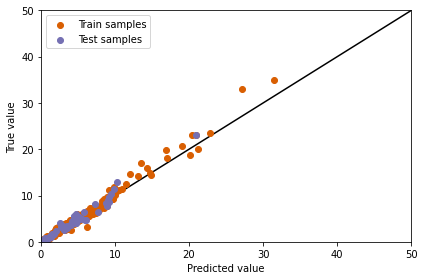

In [19]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

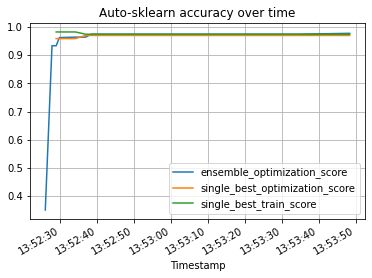

In [20]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()

In [21]:
# summarize
# At the end of the run, a summary is printed showing that 20 models were evaluated and the estimated performance of the final model was 97.1 percent.
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: car data
  Metric: r2
  Best validation score: 0.969807
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 19
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 0



## H2O AutoML

In [22]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 53 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=22a2e42477e3a612877d59b32a6a218d83beb1c827cdb010042b942f44d2a44c
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [23]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzzddmcay
  JVM stdout: /tmp/tmpzzddmcay/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzzddmcay/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_prouqx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [25]:
data = h2o.import_file('/content/car data.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
data.describe()

Rows:301
Cols:9




,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
type,enum,int,real,real,int,enum,enum,enum,int
mins,,2003.0,0.1,0.32,500.0,,,,0.0
mean,,2013.6279069767434,4.661295681063125,7.653110367892976,37005.96321070232,,,,0.04318936877076412
maxs,,2018.0,35.0,92.6,500000.0,,,,3.0
sigma,,2.8915541273367253,5.082811556177804,8.667696611452245,38998.164552343515,,,,0.2479148926949197
zeros,,0,0,0,0,,,,290
missing,0,0,0,2,2,1,0,0,0
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0


In [27]:
splits = data.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

y = TARGET_NAME

In [48]:
len(train)

246

In [28]:
splits[0]

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0
vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
s cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0
ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
alto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0
ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0


In [29]:
splits[1]

Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
alto k10,2016,2.85,3.95,25000,Petrol,Dealer,Manual,0
800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
fortuner,2015,23,30.61,40000,Diesel,Dealer,Automatic,0
corolla altis,2009,3.6,15.04,70000,Petrol,Dealer,Automatic,0
fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
fortuner,2017,33,36.23,6000,Diesel,Dealer,Automatic,0
corolla altis,2013,7.45,18.61,56001,Petrol,Dealer,Manual,0


In [30]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "cars_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |█████████
14:07:36.76: GBM_1_AutoML_1_20220320_140725 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20220320_140725.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 196.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 197.0.


███████████████████████████████

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,113,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.149277,0.356244,0.0,0.003684,0.124315,0.560786,0.116179
2,,3,10,Rectifier,0.0,0.0,0.0,0.00489,0.003586,0.0,0.027236,0.360338,1.024575,0.045205
3,,4,10,Rectifier,0.0,0.0,0.0,0.202211,0.403559,0.0,-0.064509,0.292931,1.002086,0.014446
4,,5,1,Linear,,0.0,0.0,0.201934,0.403671,0.0,0.051113,0.395777,0.007129,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 1.5158275841794948
RMSE: 1.231189499703232
MAE: 0.980141104352038
RMSLE: NaN
Mean Residual Deviance: 1.5158275841794948

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 1.979042912280449
RMSE: 1.4067846005271911
MAE: 1.0507562756287485
RMSLE: NaN
Mean Residual Deviance: 1.979042912280449

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.050854,0.145699,1.026944,0.914829,1.295629,0.974343,1.042523
1,mean_residual_deviance,1.979345,0.767076,1.905015,1.572165,3.296339,1.339332,1.783875
2,mse,1.979345,0.767076,1.905015,1.572165,3.296339,1.339332,1.783875
3,r2,0.895816,0.027968,0.901895,0.937644,0.869326,0.870767,0.899447
4,residual_deviance,1.979345,0.767076,1.905015,1.572165,3.296339,1.339332,1.783875
5,rmse,1.388516,0.253401,1.380223,1.253860,1.815582,1.157295,1.335618
6,rmsle,0.392345,0.034637,0.359307,NaN,0.412361,0.367057,0.430653



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-03-20 14:08:04,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-03-20 14:08:04,1.043 sec,32500 obs/sec,1.056911,1,260.0,2.792472,7.797902,2.117266,0.604839
2,,2022-03-20 14:08:04,1.125 sec,35924 obs/sec,11.536585,11,2838.0,1.231189,1.515828,0.980141,0.923185



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Present_Price,1.000000,1.000000,0.016465
1,Car_Name.TVS Apache RTR 180,0.855221,0.855221,0.014081
2,Year,0.827518,0.827518,0.013625
3,Car_Name.Honda CB twister,0.797743,0.797743,0.013135
4,Seller_Type.Dealer,0.733516,0.733516,0.012077
5,Car_Name.etios cross,0.732123,0.732123,0.012054
6,Car_Name.Bajaj Pulsar 135 LS,0.723334,0.723334,0.011909
7,Car_Name.Honda CB Trigger,0.722180,0.722180,0.011890
8,Car_Name.swift,0.718958,0.718958,0.011837
9,Fuel_Type.CNG,0.704438,0.704438,0.011598



See the whole table with table.as_data_frame()


A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.
Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

In [31]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_1_AutoML_1_20220320_140725,4.66181,2.15912,4.66181,1.31959,0.403195
GLM_1_AutoML_1_20220320_140725,5.62865,2.37248,5.62865,1.33459,nan
DeepLearning_grid_1_AutoML_1_20220320_140725_model_1,5.65381,2.37777,5.65381,1.33702,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20220320_140725,7.17435,2.6785,7.17435,0.912934,0.17639
StackedEnsemble_BestOfFamily_1_AutoML_1_20220320_140725,7.85627,2.8029,7.85627,1.14681,0.268616
XGBoost_grid_1_AutoML_1_20220320_140725_model_3,8.84184,2.97352,8.84184,0.960286,0.148548
StackedEnsemble_BestOfFamily_3_AutoML_1_20220320_140725,9.41824,3.06891,9.41824,0.991898,0.16954
XGBoost_grid_1_AutoML_1_20220320_140725_model_4,10.1934,3.19272,10.1934,1.04815,0.184146
StackedEnsemble_AllModels_2_AutoML_1_20220320_140725,11.5164,3.39358,11.5164,0.959818,0.181448
StackedEnsemble_BestOfFamily_2_AutoML_1_20220320_140725,12.7308,3.56802,12.7308,1.1175,0.217201


In [52]:
test_predictions = aml.predict(test)
test_predictions.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
7.69045
6.94044
3.72484
0.276075
1.14757
19.8794
5.58544
20.896
22.6835
9.05674


In [53]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 4.6618052089292386
RMSE: 2.159121397450648
MAE: 1.3195894013064318
RMSLE: 0.40319458517492357
Mean Residual Deviance: 4.6618052089292386


In [54]:
train_predictions = aml.predict(train)
perf = aml.leader.model_performance(train)
perf

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 1.5158275841794955
RMSE: 1.2311894997032322
MAE: 0.9801411043520382
RMSLE: NaN
Mean Residual Deviance: 1.5158275841794955


In [57]:
print('Check scores for test data...')
print('MAE score: {}'.format(mean_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(test.as_data_frame()[TARGET_NAME].values, test_predictions.as_data_frame().values)))

print('Check scores for train data...')
print('MAE score: {}'.format(mean_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MSE score: {}'.format(mean_squared_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('MedAE score: {}'.format(median_absolute_error(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))
print('R2 score: {}'.format(r2_score(train.as_data_frame()[TARGET_NAME].values, train_predictions.as_data_frame().values)))

Check scores for test data...
MAE score: 1.3195893775079222
MSE score: 4.661805179308799
MedAE score: 0.9364413008704968
R2 score: 0.9111260981627354
Check scores for train data...
MAE score: 0.9801410993147189
MSE score: 1.5158275831658798
MedAE score: 0.8301244012830309
R2 score: 0.9231850745840502


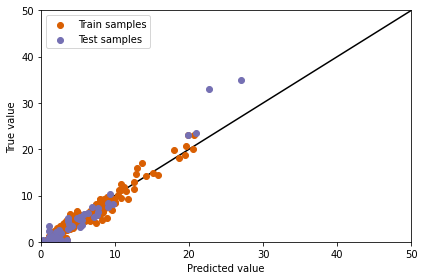

In [58]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions.as_data_frame().values, train[y].as_data_frame().values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions.as_data_frame().values, test[y].as_data_frame().values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()

### Mljar

In [1]:
pip install mljar-supervised

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [4]:
train_data = pd.read_csv('/content/car data.csv')
train_data.head()

TARGET_NAME = "Selling_Price"

X = train_data.drop(["Selling_Price"], axis=1)
y = train_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=88888888)
train_df = X_train
train_df[TARGET_NAME] = y_train
test_df = X_test
test_df[TARGET_NAME] = y_test

In [5]:
# train models with AutoML
automl = AutoML(mode="Explain")
automl.fit(train_df.drop(TARGET_NAME,1), train_df[TARGET_NAME])

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 4.108672 trained in 0.43 seconds


[2022-03-20 14:32:08,880] (WARNING): findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


2_DecisionTree rmse 2.0329 trained in 10.78 seconds
3_Linear rmse 1.516607 trained in 3.31 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost rmse 0.810451 trained in 6.54 seconds
5_Default_NeuralNetwork rmse 1.327248 trained in 0.82 seconds
6_Default_RandomForest rmse 1.453835 trained in 5.71 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.795822 trained in 0.35 seconds
AutoML fit time: 36.24 seconds
AutoML best model: Ensemble


AutoML()

In [6]:
test_predictions = automl.predict(X_test)

print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('MSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions)))
print('RMSE score: {}'.format(mean_squared_error(test_df[TARGET_NAME].values, test_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(test_df[TARGET_NAME].values, test_predictions)))
print('R2 score: {}'.format(r2_score(test_df[TARGET_NAME].values, test_predictions)))

Check scores...
OOF score: 0.49083217569651266
MSE score: 0.44248388508479464
RMSE score: 0.665194621960216
MedAE score: 0.3428871092873722
R2 score: 0.9706965303341395


In [7]:
train_predictions = automl.predict(X_train)

In [8]:
print('Check scores...')
print('MAE score: {}'.format(mean_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('MSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions)))
print('RMSE score: {}'.format(mean_squared_error(train_df[TARGET_NAME].values, train_predictions, squared=False)))
print('MedAE score: {}'.format(median_absolute_error(train_df[TARGET_NAME].values, train_predictions)))
print('R2 score: {}'.format(r2_score(train_df[TARGET_NAME].values, train_predictions)))

Check scores...
OOF score: 0.2567551287356966
MSE score: 0.2215209191406906
RMSE score: 0.4706600887484413
MedAE score: 0.12854949599893106
R2 score: 0.9921977031721502


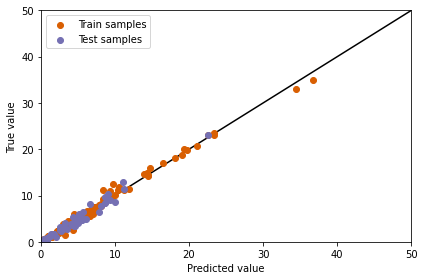

In [9]:
import matplotlib.pyplot as plt

plt.scatter(train_predictions, train_df[TARGET_NAME].values, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_df[TARGET_NAME].values, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([0, 50], [0, 50], c='k', zorder=0)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.tight_layout()
plt.show()